In [1]:
# import modules

import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Read worksheet from excel file, skiping footer

df = pd.read_excel(
    '../2_Data_Cleaning/moldova_immigration_2014_2021.xlsx',
    sheet_name='Country immigration by years',
    skipfooter=1)

print('Data has been read.')

Data has been read.


In [3]:
# Examine the types of the column labels. Ensure that all column labels of type string.

df.columns = list(map(str, df.columns))

all(isinstance(column, str) for column in df.columns)

True

In [4]:
# Set the country name as index 
df.set_index('Country', inplace=True)

# View the first five elements and see how the dataframe was changed
df.head()

,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,
Afghanistan,1,1,0,2,0,5,0,0
South Africa,0,0,1,4,3,0,1,3
Albania,9,6,6,1,4,3,1,0
Algeria,1,2,1,3,1,2,1,4
Saudi Arabia,0,0,0,0,0,1,0,0


In [5]:
#  Add total column
df['Total'] = df.sum(axis=1)

# View the first five elements and see how the dataframe was changed
df.head()

,2014,2015,2016,2017,2018,2019,2020,2021,Total
Country,,,,,,,,,
Afghanistan,1,1,0,2,0,5,0,0,9
South Africa,0,0,1,4,3,0,1,3,12
Albania,9,6,6,1,4,3,1,0,30
Algeria,1,2,1,3,1,2,1,4,15
Saudi Arabia,0,0,0,0,0,1,0,0,1


In [6]:
# Create years variable

years = list(map(str, range(2014, 2022)))
years

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [7]:
# Check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.6.3


In [8]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,Ukraine,Russia,Romania,Turkey,Israel
2014,534,516,852,421,525
2015,754,567,646,347,548
2016,734,705,464,293,594
2017,681,685,427,245,456
2018,752,683,450,430,489


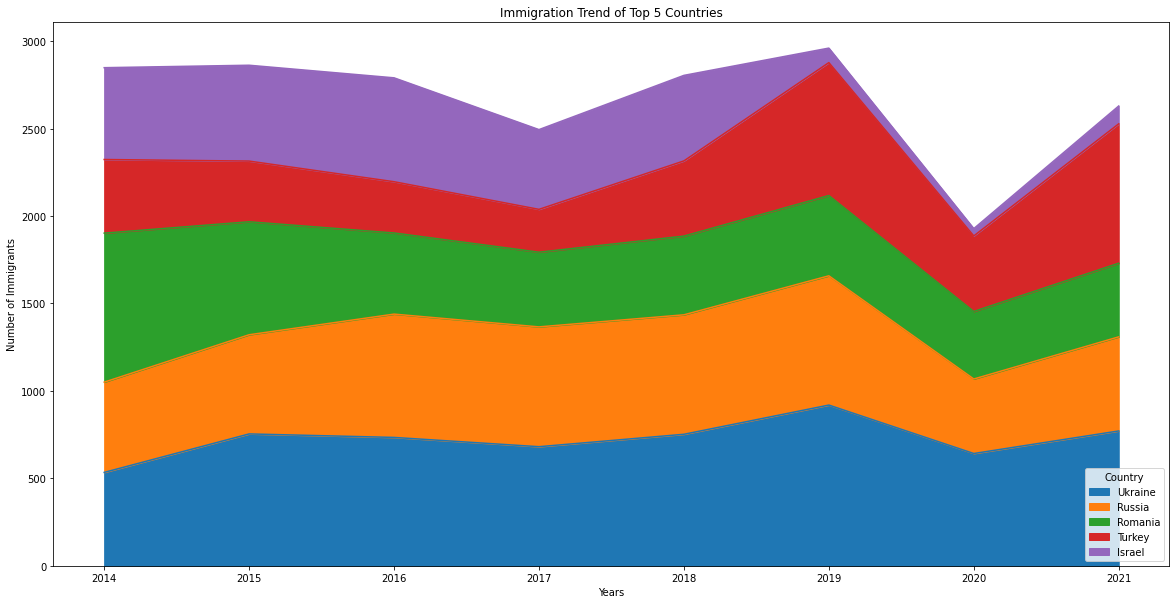

In [9]:
# Changeed the index values of df_top5 to type integer for plotting

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=True,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

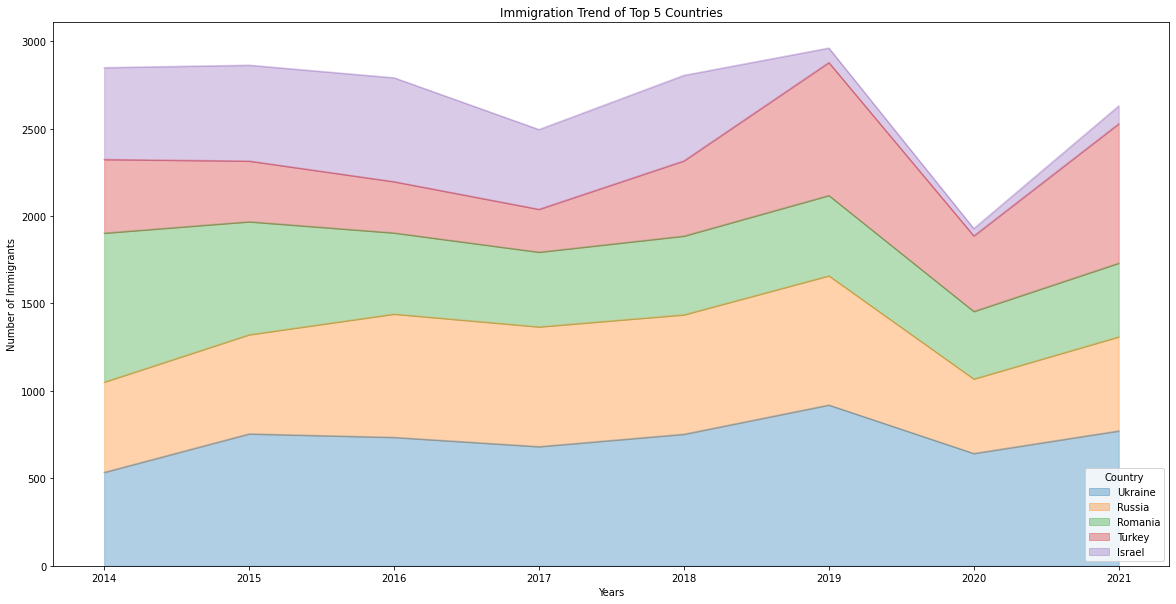

In [10]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

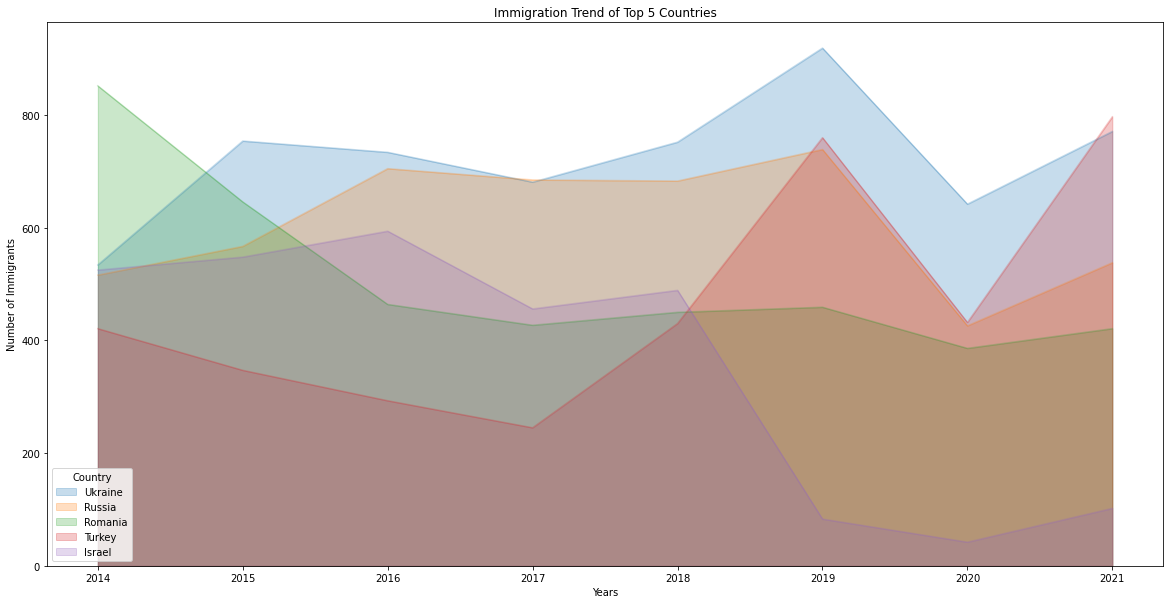

In [11]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [12]:
df['2021'].head()

Country
Ukraine    771
Russia     538
Romania    421
Turkey     797
Israel     102
Name: 2021, dtype: int64

In [13]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2021'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[111   5   0   1   0   1   1   0   0   2]
[  0.   79.7 159.4 239.1 318.8 398.5 478.2 557.9 637.6 717.3 797. ]


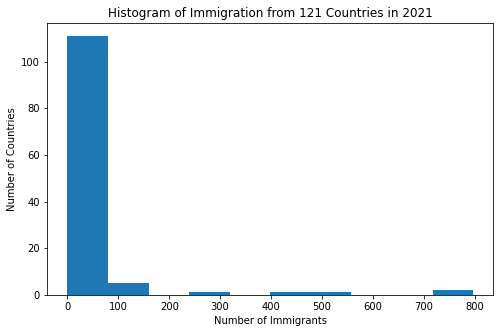

In [14]:
df['2021'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 121 Countries in 2021')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In [15]:
# get the data
df_ukraine = df.loc['Ukraine', years]
df_ukraine.head()

2014    534
2015    754
2016    734
2017    681
2018    752
Name: Ukraine, dtype: int64

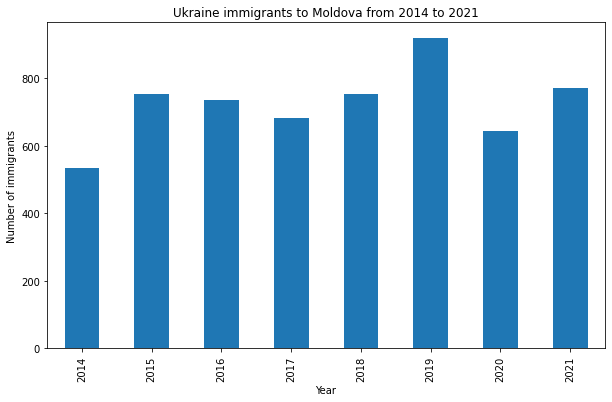

In [16]:
df_ukraine.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Ukraine immigrants to Moldova from 2014 to 2021')

plt.show()


In [17]:
# sort dataframe on 'Total' column (descending)
df.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df['Total'].tail(15)
df_top15

Country
Kazakhstan     233
Armenia        239
France         270
Belarus        298
Germany        320
Uzbekistan     530
Azerbaijan     897
India         1025
Italy         1140
U.S.          1424
Israel        2839
Turkey        3725
Romania       4105
Russia        4859
Ukraine       5787
Name: Total, dtype: int64

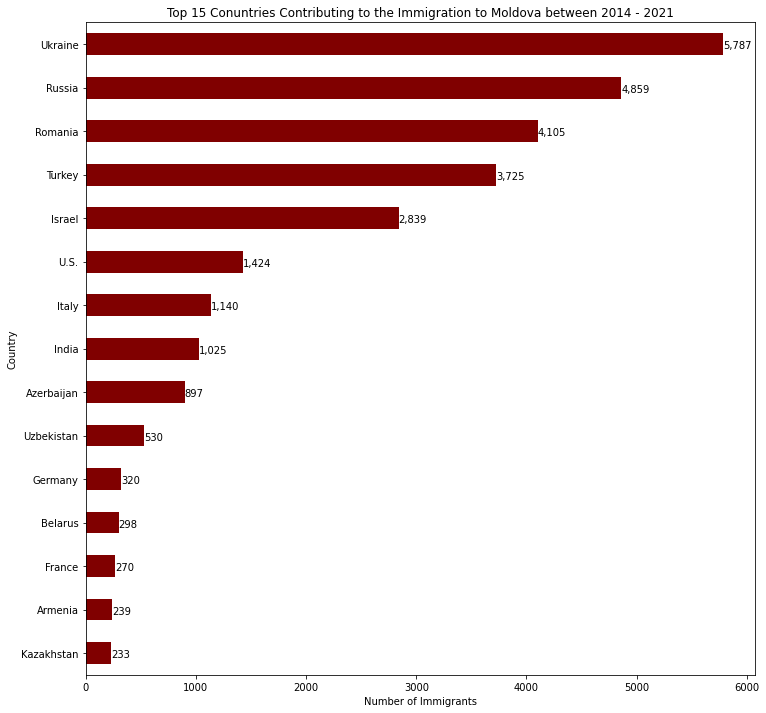

In [18]:
df_top15.plot(kind='barh', figsize=(12, 12), color='maroon')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Moldova between 2014 - 2021')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar 
    plt.annotate(label, xy=(value, index - 0.10), color='black')

plt.show()